<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Keysi Fuentes Piña, José de Jesús Morales Dominguez.

**Fecha:** 04 de Marzo del 2024.

**Expediente** :740476,742298.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/keysifuentes/PROYECTOCONJUNTOKFUENTES_Jmorales_Acaravez

# Tarea 5: Clase 10

# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)
5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)
7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$

9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    

Demuestre matemáticamente que 
 $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
 y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.
> **Ayuda**: $
\begin{aligned}
\frac{p_{k+1}}{p_k}& = \frac{e^{-\lambda}(\lambda)^k}{k!} \\
& = \frac{e^{-\lambda}(\lambda)^k}{k!}
\end{aligned}
$

Código de solución estudiante 1 Keysi fuentes piña

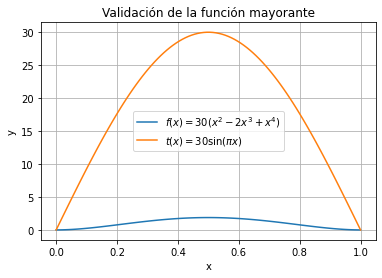

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: 30 * (x**2 - 2 * x**3 + x**4)

a = 30 
t = lambda x: a * np.sin(np.pi * x)

x = np.linspace(0, 1, 100)


plt.plot(x, f(x), label='$f(x) = 30(x^2 - 2x^3 + x^4)$')
plt.plot(x, t(x), label='$t(x) = 30\sin(\pi x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Validación de la función mayorante')
plt.legend()
plt.grid(True)
plt.show()



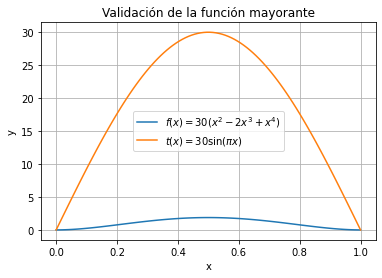

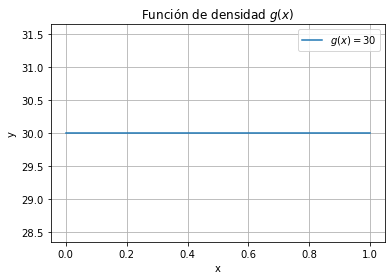

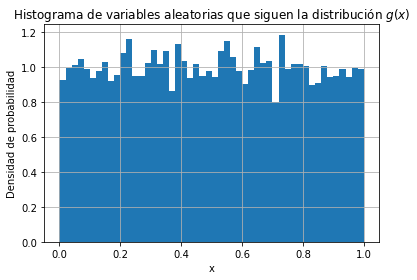

In [3]:
def f(x):
    return 30 * (x**2 - 2 * x**3 + x**4)

a = 30  
def t(x):
    return a * np.sin(np.pi * x)

def g(x):
    return np.full_like(x, a)  

x_values = np.linspace(0, 1, 100)

plt.plot(x_values, f(x_values), label='$f(x) = 30(x^2 - 2x^3 + x^4)$')
plt.plot(x_values, t(x_values), label='$t(x) = 30\sin(\pi x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Validación de la función mayorante')
plt.legend()
plt.grid(True)
plt.show()

# Graficar g(x)
plt.plot(x_values, g(x_values), label='$g(x) = 30$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función de densidad $g(x)$')
plt.legend()
plt.grid(True)
plt.show()

N = 10000
U = np.random.rand(N)

x = U

plt.hist(x, bins=50, density=True)
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma de variables aleatorias que siguen la distribución $g(x)$')
plt.grid(True)
plt.show()




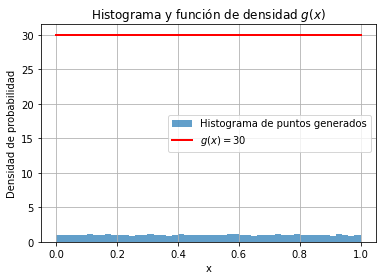

In [4]:

def g(x):
    return np.full_like(x, 30) 


N = 10000
x = np.random.uniform(0, 1, N)

plt.hist(x, bins=50, density=True, alpha=0.7, label='Histograma de puntos generados')

x_values = np.linspace(0, 1, 100)
plt.plot(x_values, g(x_values), 'r-', linewidth=2, label='$g(x) = 30$')

plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma y función de densidad $g(x)$')
plt.legend()
plt.grid(True)
plt.show()

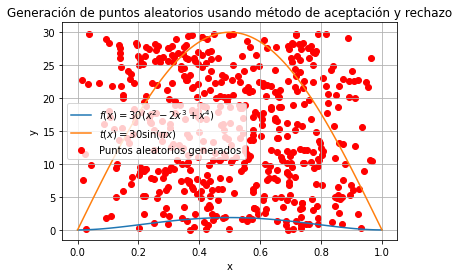

In [5]:
def f(x):
    return 30 * (x**2 - 2 * x**3 + x**4)

a = 30  # Máximo de f(x)
def t(x):
    return a * np.sin(np.pi * x)

# Algoritmo de aceptación y rechazo
def aceptacion_rechazo(f, t, N=500):
    aceptados = []
    i = 0
    while len(aceptados) < N:
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, t(x))
        if y <= f(x):
            aceptados.append(x)
    return aceptados

puntos_aleatorios = aceptacion_rechazo(f, t, N=500)

x_values = np.linspace(0, 1, 100)
plt.plot(x_values, f(x_values), label='$f(x) = 30(x^2 - 2x^3 + x^4)$')
plt.plot(x_values, t(x_values), label='$t(x) = 30\sin(\pi x)$')
plt.scatter(puntos_aleatorios, np.random.uniform(0, a, len(puntos_aleatorios)), color='red', label='Puntos aleatorios generados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generación de puntos aleatorios usando método de aceptación y rechazo')
plt.legend()
plt.grid(True)
plt.show()



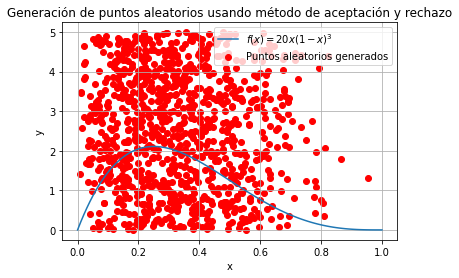

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 20 * x * (1 - x)**3

def t(x):
    return 5 * np.ones_like(x)  

def aceptacion_rechazo(f, t, N=1000):
    aceptados = []
    i = 0
    while len(aceptados) < N:
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, t(x))
        if y <= f(x):
            aceptados.append(x)
    return aceptados

puntos_aleatorios = aceptacion_rechazo(f, t, N=1000)

x_values = np.linspace(0, 1, 100)
plt.plot(x_values, f(x_values), label='$f(x) = 20x(1-x)^3$')
plt.scatter(puntos_aleatorios, np.random.uniform(0, 5, len(puntos_aleatorios)), color='red', label='Puntos aleatorios generados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generación de puntos aleatorios usando método de aceptación y rechazo')
plt.legend()
plt.grid(True)
plt.show()




In [7]:


def P(k, lambd):
    return np.exp(-lambd) * (lambd**k) / np.math.factorial(k)

def generar_poisson(lambd, N=1000):
    u = np.random.rand(N)  
    k = np.zeros_like(u)  
    cum_prob = P(0, lambd)  
    i = 0
    for p in u:
        while p > cum_prob:  
            i += 1
            cum_prob += P(i, lambd)
        k[i] = i
    return k

variables_poisson = generar_poisson(5, N=1000)

print(variables_poisson)


[ 0.  0.  0.  0.  0.  5.  6.  7.  0.  9. 10. 11. 12.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

Código de solución estudiante 2

## 1

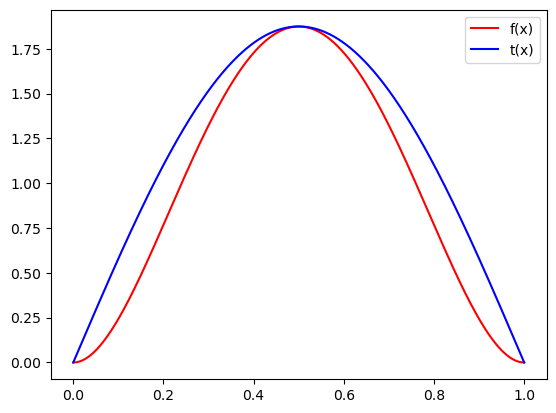

In [1]:
# Código de solución estudiante 2
# Código de solución estudiante 2
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline
def f(x):
    return 30*((x**2)-(2*x**3)+(x**4))
nums=np.linspace(0,1,1000)
c=f(optimize.fmin(lambda x: -f(x),0,disp=False))
def t(x):
    return c*np.sin(np.pi*x)
plt.figure()
plt.plot(nums,f(nums),label='f(x)',color='red')
plt.plot(nums,t(nums),label='t(x)',color='blue')
plt.legend()
plt.show()

## 2

$$ g(x) = \frac{t(x)}{c} $$

Se plantea la integral de la siguiente manera:
$$ c \int_{0}^{1}t(x)dx $$
lo que es:

$$ a \int_{0}^{1}\sin (\pi x)dx $$

El resultado es:

$$ \frac{a}{\pi}[-\cos(\pi x)]_{1}^{0}$$

Evaluamos los límites:

$$ \frac{2a}{\pi} $$

Sustituimos:

$$ g(x) = \frac{t(x)}{c}  = \frac{a\sin(\pi x)}{\frac{2a}{\pi}} = \frac{\pi}{2}\sin(\pi x)$$

## 3

Para obtener $ G(x) $ integramos:

$$ G(x) = \int_{0}^{x}\frac{\pi}{2}\sin(\pi x)dx $$

Se obtiene: 

$$ \frac{1}{2}[-\cos(\pi x)]_{0}^{x} $$

Al evaluar los límites tenemos como resultado:

$$ -\frac{1}{2}\cos(\pi x) + \frac{1}{2} $$

Simplificando e igualando a $ U $ obtenemos:

$$ U = \frac{1}{2}(-\cos(\pi x) + 1) $$

Despejando $ x $ llegamos al siguiente resultado:

$$ 2U = -\cos(\pi x) + 1 $$

$$ 2U - 1 = -\cos(\pi x) $$

$$ -cos^{-1}(2U - 1) = \pi x $$

$$ \frac{1}{\pi}(-cos^{-1}(2U - 1)) = x $$

$$ x = \frac{1}{\pi}cos^{-1}(1 - 2U) $$

## 4

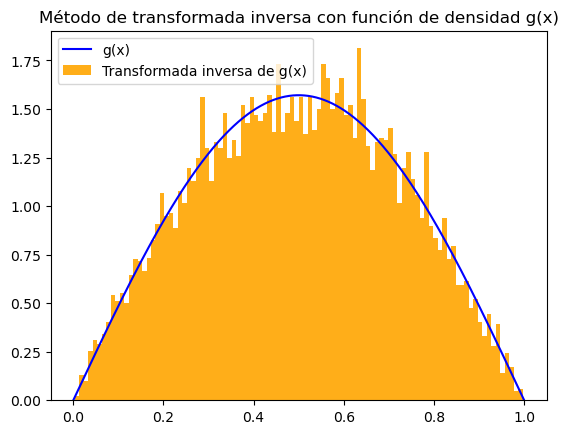

In [2]:
#Guardamos la función de probabilidad g(x) en una función y su gráfica en otra
def g(x):
    return (np.pi/2)*(np.sin(np.pi*x))
def inversa(N:'Ensayos'):
    v=np.random.rand(N)
    return (1/np.pi)*(np.arccos(1-2*v))

def graficar():
    x=np.linspace(0,1,10000)
    plt.figure()
    plt.plot(x,g(x),color='blue',label='g(x)')
    plt.hist(inversa(10000),bins=100,density=True,color='orange',alpha=0.9,label='Transformada inversa de g(x)')
    plt.title('Método de transformada inversa con función de densidad g(x)')
    plt.legend()
    plt.show()
graficar()

## 5

In [3]:
def acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

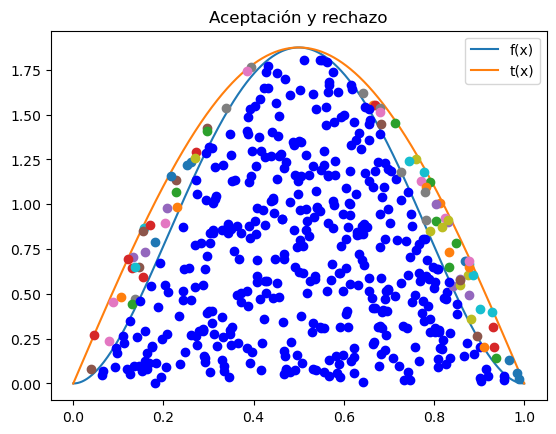

In [4]:
N=500
x=np.linspace(0,1,1000)
plt.title('Aceptación y rechazo')
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
R1=np.random.rand(N)
R2=inversa(N)
aleatorios=acep_rechazo(R1,R2,f,t)

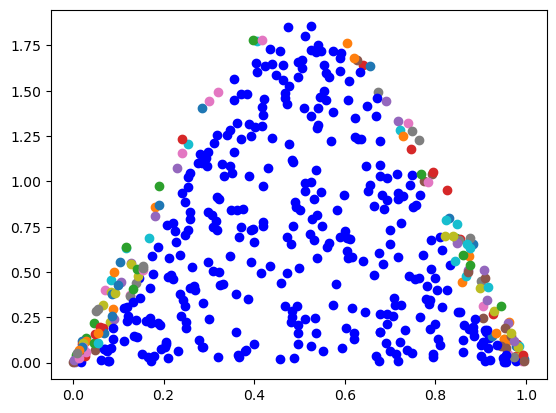

In [5]:
R1=np.random.rand(N)
R2=np.random.rand(N)
aleatorios2=acep_rechazo(R1,R2,f,t)

In [7]:
senoidal=len(aleatorios)/N
constante=len(aleatorios2)/N
print(f'Porcentaje de aceptación constante t(x): {constante*100}%')
print(f'Porcentaje de aceptación senoidal t(x): {senoidal*100}%')

Porcentaje de aceptación constante t(x): 69.6%
Porcentaje de aceptación senoidal t(x): 83.39999999999999%


## 6

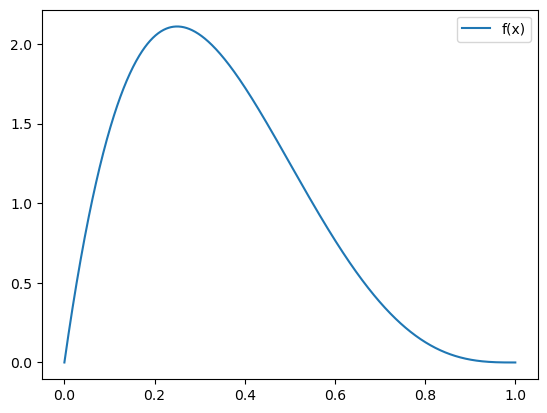

In [8]:
f_x=lambda x: 20*x*(1-x)**3
x=np.linspace(0,1,1000)
plt.plot(x,f_x(x),label='f(x)')
plt.legend()

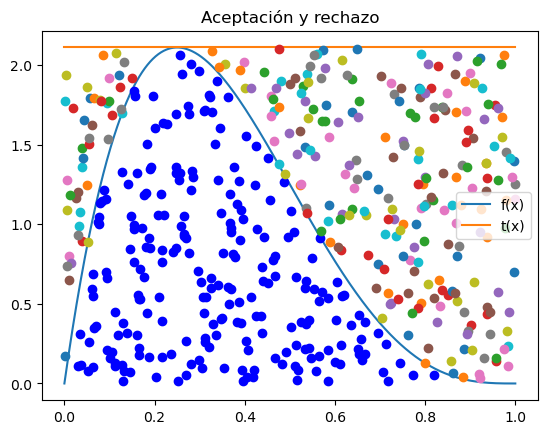

In [9]:
def t(x):
    return np.max(f_x(x))*np.ones([len(x)])
    return t
plt.title('Aceptación y rechazo')
plt.plot(x,f_x(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
R1=np.random.rand(N)
R2=np.random.rand(N)
aleatorios3=acep_rechazo(R1,R2,f_x,t)

In [1]:
# Código de solución estudiante 2
.
.
.
.


SyntaxError: invalid syntax (2925374305.py, line 2)

### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........